In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import ContourMethoden

True


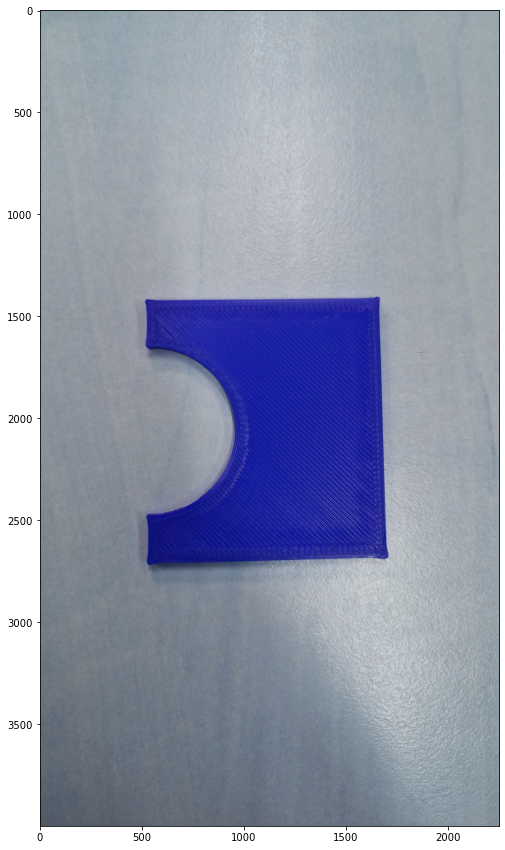

In [ ]:
cap = cv2.VideoCapture('Teil2.jpg')
ret, image = cap.read()

print(ret)  #debug ob bild erfolgreich geladen wurde

Kontur_aussen, Kontur_innen = ContourMethoden.getContours(image)

Kontur_aussen = np.array(Kontur_aussen)
Kontur_innen = np.array(Kontur_innen)


plt.figure(figsize = (15,15))
plt.imshow(image)   #Farbraum ist falsch weil matpltlib aber ist egal

In [3]:
print(Kontur_aussen)

[[[[1644 1407]]

  [[1643 1408]]

  [[1642 1408]]

  ...

  [[1658 1408]]

  [[1656 1408]]

  [[1655 1407]]]]


In [4]:
type(Kontur_aussen)

numpy.ndarray

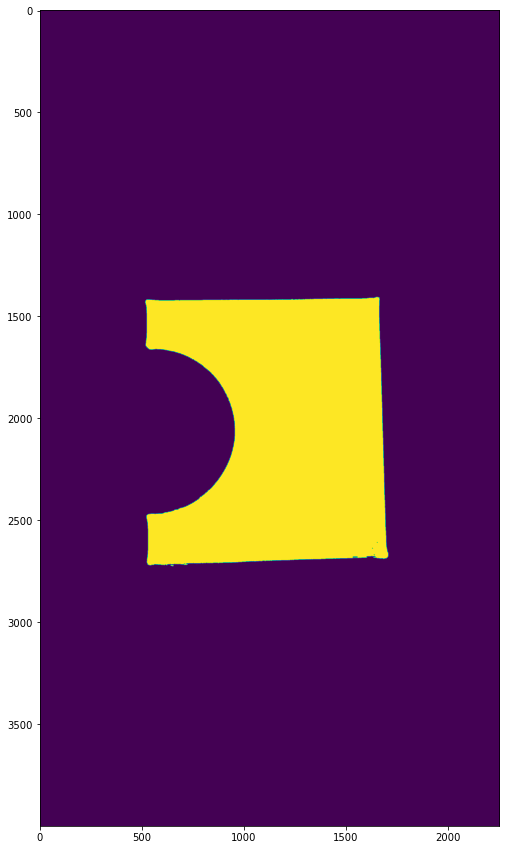

In [ ]:
#Methode zum erstallen und anzeigen der Maske, für debug-zwecke
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

lower_red2 = np.array([170, 120, 70])
upper_red2= np.array([180, 255, 255])
#mache ein weichzeichen um rauschen los zu werden
img = cv2.GaussianBlur(image, (5, 5), 0)

#Rufe Contours auf:
# konvertiere von BGR zu HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2 Masken weil rot in HSV am anfang und ende liegt
mask1 = cv2.inRange(hsv, lower_red, upper_red)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
# Füge beide Masken zusammen
mask = mask1 + mask2

plt.figure(figsize = (15,15))
plt.imshow(mask)    #Farbraum falsch weil matpltlib

In [8]:
# Calculate Moments 
moments = cv2.moments(Kontur_aussen[0]) 
# Calculate Hu Moments 
huMoments_aussen = cv2.HuMoments(moments)

#Die inneren Hu-Momente brauchen wir ja nicht eigentlich

# Calculate Moments 
#moments = cv2.moments(Kontur_innen[0]) 
# Calculate Hu Moments 
#huMoments_innen = cv2.HuMoments(moments)

In [9]:
print("huMoments Außen:", huMoments_aussen)
#print("huMoments Innen:", huMoments_innen)

huMoments Außen: [[ 2.07249644e-01]
 [ 3.26402724e-03]
 [ 3.73561355e-04]
 [ 1.95119622e-04]
 [-5.21383531e-08]
 [-1.11447098e-05]
 [-7.52353679e-09]]
